
# Data Wrangling & Analysis


## Introduction

#### Real-world data rarely comes clean.

#### Our goal: wrangling WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. 

#### WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. 
#### The Twitter archive only contains very basic tweet information. Using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time
import re
import matplotlib.pyplot as plt
%matplotlib inline

### Gathering Data


### 1. Twitter archive file

In [2]:
arc_df=pd.read_csv('twitter-archive-enhanced.csv')


### 2. Tweet image prediction

In [3]:
# using requsests to download image_predictions.tsv file

URL = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(URL)
with open('image_predictions.tsv',mode='wb') as file:
    file.write(response.content)
    
    
img_df=pd.read_csv('image_predictions.tsv',sep='\t')


In [4]:
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3.Read JSON file

In [5]:
CONSUMER_KEY = ""
CONSUMER_SECRET = ""
OAUTH_TOKEN = ""
OAUTH_TOKEN_SECRET = ""

In [6]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth)

In [7]:
# error_list = []
# df_list = []
# start = time.time()

# for tweet_id in twitter_archive['tweet_id']:
#     try:
#         tweet = api.get_status(tweet_id, tweet_mode='extended',
#                                wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json 
#         favorites = tweet['favorite_count'] 
#         retweets = tweet['retweet_count'] 
#         user_followers = tweet['user']['followers_count'] 
#         user_favourites = tweet['user']['favourites_count']
#         date_time = tweet['created_at'] 
        
#         df_list.append({'tweet_id': int(tweet_id),
#                         'favorites': int(favorites),
#                         'retweets': int(retweets),
#                         'user_followers': int(user_followers),
#                         'user_favourites': int(user_favourites),
#                         'date_time': pd.to_datetime(date_time)})
#     except Exception as e:
        
#         error_list.append(tweet_id)

In [8]:
# df=pd.DataFrame(df_list)
# df.to_csv('tweet-json.txt')

In [9]:
json_tweets = pd.read_json('tweet-json.txt', lines=True)

In [10]:
json_tweets.to_csv('tweet-json.csv')

In [11]:
json_tweets=pd.read_csv('tweet-json.csv')

In [12]:
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 32 columns):
Unnamed: 0                       2354 non-null int64
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null 

### Gathering :summry 
the gathering data that is frist and important step in data wrangling .

1-getting data from file 'twitter-archive-enhanced.csv' using pandas.

2-download file image_predictions.tsv programmatically using requests.

3-read the json file (tweet_json.txt)

### Assessing Data

In [13]:
arc_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2158,669573570759163904,NaN,NaN,2015-11-25 17:49:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Linda. She just looked up and saw you ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669573570...,10,10,Linda,None,None,None,None
912,757596066325864448,NaN,NaN,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's another picture without a dog in it. Id...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757596066...,4,10,None,None,None,None,None
378,827933404142436356,NaN,NaN,2017-02-04 17:34:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kona. Yesterday she stopped by the dep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827933404...,12,10,Kona,None,None,pupper,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
187,856282028240666624,NaN,NaN,2017-04-23 23:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Cermet, Paesh, and Morple. They are ab...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856282028...,14,10,Cermet,None,None,None,None
2173,669324657376567296,NaN,NaN,2015-11-25 01:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Ralf. He's a miniature Buick DiCaprio. Ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669324657...,11,10,Ralf,None,None,None,None
717,783695101801398276,NaN,NaN,2016-10-05 15:47:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Loomis. He's the leader of the Kenneth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783695101...,12,10,Loomis,None,None,None,None
1414,698710712454139905,NaN,NaN,2016-02-14 03:29:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cuddles. He's not entirely sure how do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698710712...,10,10,Cuddles,None,None,None,None
910,757611664640446465,NaN,NaN,2016-07-25 16:21:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He tries to come across as fei...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757611664...,12,10,Cooper,None,None,None,None
684,788178268662984705,NaN,NaN,2016-10-18 00:41:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas is back and this time he's got doggles. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788178268...,13,10,None,None,None,None,None


In [14]:
img_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
260,670783437142401025,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg,1,lacewing,0.381955,False,sulphur_butterfly,0.106810,False,leafhopper,0.068347,False
1683,813944609378369540,https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg,1,Labrador_retriever,0.427742,True,Great_Dane,0.190503,True,curly-coated_retriever,0.146427,True
612,680130881361686529,https://pbs.twimg.com/media/CXBPbVtWAAA2Vus.jpg,1,Maltese_dog,0.199121,True,West_Highland_white_terrier,0.197897,True,Shih-Tzu,0.157130,True
156,668826086256599040,https://pbs.twimg.com/media/CUglxbFXAAA5O0d.jpg,1,malinois,0.640185,True,Irish_terrier,0.153700,True,Rhodesian_ridgeback,0.068457,True
1361,761227390836215808,https://pbs.twimg.com/media/CpBsRleW8AEfO8G.jpg,1,cougar,0.306512,False,French_bulldog,0.280802,True,boxer,0.054523,True
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,0.114071,False,common_iguana,0.043255,False
222,670290420111441920,https://pbs.twimg.com/media/CU1Zgk7UcAAjw2t.jpg,1,Chihuahua,0.368876,True,Pomeranian,0.282102,True,papillon,0.178795,True
172,669000397445533696,https://pbs.twimg.com/media/CUjETvDVAAI8LIy.jpg,1,Pembroke,0.822940,True,Cardigan,0.177035,True,basenji,0.000023,True
1648,808838249661788160,https://pbs.twimg.com/media/CzmSFlKUAAAQOjP.jpg,1,Rottweiler,0.369530,True,miniature_pinscher,0.194867,True,kelpie,0.160104,True
369,672970152493887488,https://pbs.twimg.com/media/CVbeyGUU8AEq300.jpg,1,leaf_beetle,0.340154,False,rhinoceros_beetle,0.139698,False,crayfish,0.058034,False


In [15]:
json_tweets.duplicated().sum()

0

In [16]:
json_tweets.sample(10)

,Unnamed: 0,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
807,807,NaN,NaN,2016-09-02 18:03:10,"[0, 100]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 771770449999097856, 'id_str'...",13356,False,This is Davey. He'll have your daughter home b...,...,0.0,NaN,NaN,NaN,3924,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
350,350,NaN,NaN,2017-02-14 02:02:51,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 831322776149430272, 'id_str'...",10042,False,This is Pete. He has no eyes. Needs a guide do...,...,0.0,NaN,NaN,NaN,1744,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1632,1632,NaN,NaN,2016-01-05 04:11:44,"[0, 126]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 684225739852492800, 'id_str'...",1369,False,"Two sneaky puppers were not initially seen, mo...",...,0.0,NaN,NaN,NaN,239,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
351,351,NaN,NaN,2017-02-14 01:35:49,"[0, 134]","{'hashtags': [{'text': 'WKCDogShow', 'indices'...","{'media': [{'id': 831314890077908992, 'id_str'...",7117,False,I couldn't make it to the #WKCDogShow BUT I ha...,...,0.0,NaN,NaN,NaN,1264,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1799,1799,NaN,NaN,2015-12-16 02:51:45,"[0, 80]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 676957802976419840, 'id_str'...",2395,False,10/10 I'd follow this dog into battle no quest...,...,0.0,NaN,NaN,NaN,907,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1816,1816,NaN,NaN,2015-12-15 02:43:33,"[0, 80]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,4954,False,This pupper loves leaves. 11/10 for committed ...,...,0.0,NaN,NaN,NaN,2410,False,NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
293,293,NaN,NaN,2017-03-03 01:58:22,"[0, 132]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 837482239088820224, 'id_str'...",4204,False,This is Waffles. He's a ship captain in real l...,...,0.0,NaN,NaN,NaN,495,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1579,1579,NaN,NaN,2016-01-13 04:10:18,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 687124481781927936, 'id_str'...",2371,False,Say hello to Samson. He's a Firecracker Häagen...,...,0.0,NaN,NaN,NaN,577,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1796,1796,NaN,NaN,2015-12-16 20:48:40,"[0, 73]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 677228864888823810, 'id_str'...",3837,False,Say hello to Chuq. He just wants to fit in. 11...,...,0.0,NaN,NaN,NaN,1840,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [17]:
arc_df.duplicated().sum()

0

In [18]:
img_df.duplicated().sum()

0

In [19]:
arc_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
arc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [21]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 32 columns):
Unnamed: 0                       2354 non-null int64
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null 

## Quality

1- Delete columns that won't be used for analysis

2-unnecessary html tags in source column in place of utility name e.g. <a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>



3-extract the rating numerator and rating denominator from the text and Rating denominator should have 10 . 

4-Delete unreasonable rate rows at the column that has the value of (rating_numerator / rating_denominator ) 'rate' 

5-Remove outlier rating.

6-Remove all un-original tweets (retweets).

7-Change datatype of tweet_id column to a string and
Change datatype timestamp column to data time.

8-Change missing values in 'name' from 'None' to NaN (dog stages already covered).

9-Remove uncorrct names



## Tidiness


1-Dog "stage" variable in four columns: doggo, floofer, pupper, puppo


2-Join 'json_tweets' and 'arc_df'

In [23]:
arc_clean=arc_df.copy()
img_clean=img_df.copy()
json_tweets_clean=json_tweets.copy()

In [24]:
json_tweets_clean.head(1)

,Unnamed: 0,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


# cleaning data

### Define


Delete columns that won't be used for analysis

### code

In [25]:
arc_clean.drop(columns=['expanded_urls','retweeted_status_timestamp','retweeted_status_user_id','in_reply_to_user_id','in_reply_to_status_id'],inplace=True)
json_tweets_clean.drop(columns=['truncated','source','retweeted_status','quoted_status_id_str','quoted_status_id','quoted_status','possibly_sensitive_appealable','extended_entities','entities','coordinates','contributors','possibly_sensitive','place','lang','in_reply_to_user_id_str','in_reply_to_user_id','in_reply_to_status_id_str','in_reply_to_status_id','in_reply_to_screen_name','id_str'],inplace=True)

### Test

In [26]:
arc_clean.head()
json_tweets_clean.head()

,Unnamed: 0,created_at,display_text_range,favorite_count,favorited,full_text,geo,id,is_quote_status,retweet_count,retweeted,user
0,0,2017-08-01 16:23:56,"[0, 85]",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,892420643555336193,False,8853,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,1,2017-08-01 00:17:27,"[0, 138]",33819,False,This is Tilly. She's just checking pup on you....,NaN,892177421306343426,False,6514,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,2,2017-07-31 00:18:03,"[0, 121]",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,891815181378084864,False,4328,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,3,2017-07-30 15:58:51,"[0, 79]",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,891689557279858688,False,8964,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,4,2017-07-29 16:00:24,"[0, 138]",41048,False,This is Franklin. He would like you to stop ca...,NaN,891327558926688256,False,9774,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Define

Change missing values in 'name' from 'None' to NaN (dog stages already covered).

### Code

In [27]:
arc_clean['name'] = arc_clean['name'].replace('None', np.NaN)

### Test

In [28]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id               2356 non-null int64
timestamp              2356 non-null object
source                 2356 non-null object
text                   2356 non-null object
retweeted_status_id    181 non-null float64
rating_numerator       2356 non-null int64
rating_denominator     2356 non-null int64
name                   1611 non-null object
doggo                  2356 non-null object
floofer                2356 non-null object
pupper                 2356 non-null object
puppo                  2356 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 221.0+ KB


### Define


#### unnecessary html tags in source column in place of utility name e.g. <a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>

### code

In [29]:
arc_clean['source'] = arc_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x))


### Test

In [30]:
arc_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,[Twitter for iPhone],This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,[Twitter for iPhone],This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,[Twitter for iPhone],This is Archie. He is a rare Norwegian Pouncin...,NaN,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,[Twitter for iPhone],This is Darla. She commenced a snooze mid meal...,NaN,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,[Twitter for iPhone],This is Franklin. He would like you to stop ca...,NaN,12,10,Franklin,None,None,None,None


### Define

extract the rating numerator and rating denominator from the text and remove 
rating denominator which has not ''10'' 

### code

In [31]:
ratings = arc_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings[0]=ratings[0].astype(float)
ratings[1]=ratings[1].astype(float)
ratings.drop(ratings[ratings[1]!=10].index ,inplace=True)


In [32]:
arc_clean.rating_denominator=ratings[1]
arc_clean.rating_numerator=ratings[0]


### Test

In [33]:
arc_clean.head(1)

,tweet_id,timestamp,source,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,[Twitter for iPhone],This is Phineas. He's a mystical boy. Only eve...,NaN,13.0,10.0,Phineas,None,None,None,None


### Define

Delete unreasonable rate rows at the column that has the value of (rating_numerator / rating_denominator ) 'rate'

### code

In [34]:
arc_clean['rate']=arc_clean.rating_numerator/arc_clean.rating_denominator
arc_clean.drop(columns=['rating_numerator','rating_denominator'],inplace=True)

### Test

In [35]:
arc_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,name,doggo,floofer,pupper,puppo,rate
0,892420643555336193,2017-08-01 16:23:56 +0000,[Twitter for iPhone],This is Phineas. He's a mystical boy. Only eve...,NaN,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,[Twitter for iPhone],This is Tilly. She's just checking pup on you....,NaN,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,[Twitter for iPhone],This is Archie. He is a rare Norwegian Pouncin...,NaN,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,[Twitter for iPhone],This is Darla. She commenced a snooze mid meal...,NaN,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,[Twitter for iPhone],This is Franklin. He would like you to stop ca...,NaN,Franklin,None,None,None,None,1.2


In [36]:
arc_clean[arc_clean['rate']>1.7]

,tweet_id,timestamp,source,text,retweeted_status_id,name,doggo,floofer,pupper,puppo,rate
188,855862651834028034,2017-04-22 19:15:32 +0000,[Twitter for iPhone],@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,None,None,None,None,42.0
189,855860136149123072,2017-04-22 19:05:32 +0000,[Twitter for iPhone],@s8n You tried very hard to portray this good ...,NaN,NaN,None,None,None,None,66.6
290,838150277551247360,2017-03-04 22:12:52 +0000,[Twitter for iPhone],@markhoppus 182/10,NaN,NaN,None,None,None,None,18.2
979,749981277374128128,2016-07-04 15:00:45 +0000,[TweetDeck],This is Atticus. He's quite simply America af....,NaN,Atticus,None,None,None,None,177.6
2074,670842764863651840,2015-11-29 05:52:33 +0000,[Twitter for iPhone],After so many requests... here you go.\n\nGood...,NaN,NaN,None,None,None,None,42.0


### Define

remove outlier rating

### code

In [37]:
arc_clean.drop(arc_clean[arc_clean['rate']>1.7].index,inplace=True)
arc_clean.drop(arc_clean[arc_clean['rate']==0].index,inplace=True)

### Test

In [38]:
arc_clean[arc_clean['rate']>1.7]


,tweet_id,timestamp,source,text,retweeted_status_id,name,doggo,floofer,pupper,puppo,rate


In [39]:
arc_clean[arc_clean['rate']==0]

,tweet_id,timestamp,source,text,retweeted_status_id,name,doggo,floofer,pupper,puppo,rate


### Define

Remove all un-original tweets (retweets).

### Code

In [40]:
arc_clean.drop(arc_clean[~(arc_clean.retweeted_status_id).isnull()].index,inplace=True)

### Test

In [41]:
arc_clean[~(arc_clean.retweeted_status_id).isnull()]

,tweet_id,timestamp,source,text,retweeted_status_id,name,doggo,floofer,pupper,puppo,rate


### Define

Change datatype of tweet_id column to a string and Change datatype timestamp column to data time.

### Code

In [42]:
arc_clean.tweet_id=arc_clean.tweet_id.astype(str)
arc_clean.timestamp=pd.to_datetime(arc_clean.timestamp)

### Test

In [43]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id               2168 non-null object
timestamp              2168 non-null datetime64[ns]
source                 2168 non-null object
text                   2168 non-null object
retweeted_status_id    0 non-null float64
name                   1494 non-null object
doggo                  2168 non-null object
floofer                2168 non-null object
pupper                 2168 non-null object
puppo                  2168 non-null object
rate                   2146 non-null float64
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 203.2+ KB


In [44]:
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 32 columns):
Unnamed: 0                       2354 non-null int64
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null 

In [45]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Tidiness

### Define

Dog "stage" variable in four columns: doggo, floofer, pupper, puppo

In [46]:
arc_clean

,tweet_id,timestamp,source,text,retweeted_status_id,name,doggo,floofer,pupper,puppo,rate
0,892420643555336193,2017-08-01 16:23:56,[Twitter for iPhone],This is Phineas. He's a mystical boy. Only eve...,NaN,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27,[Twitter for iPhone],This is Tilly. She's just checking pup on you....,NaN,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03,[Twitter for iPhone],This is Archie. He is a rare Norwegian Pouncin...,NaN,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51,[Twitter for iPhone],This is Darla. She commenced a snooze mid meal...,NaN,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24,[Twitter for iPhone],This is Franklin. He would like you to stop ca...,NaN,Franklin,None,None,None,None,1.2
5,891087950875897856,2017-07-29 00:08:17,[Twitter for iPhone],Here we have a majestic great white breaching ...,NaN,NaN,None,None,None,None,1.3
6,890971913173991426,2017-07-28 16:27:12,[Twitter for iPhone],Meet Jax. He enjoys ice cream so much he gets ...,NaN,Jax,None,None,None,None,1.3
7,890729181411237888,2017-07-28 00:22:40,[Twitter for iPhone],When you watch your owner call another dog a g...,NaN,NaN,None,None,None,None,1.3
8,890609185150312448,2017-07-27 16:25:51,[Twitter for iPhone],This is Zoey. She doesn't want to be one of th...,NaN,Zoey,None,None,None,None,1.3
9,890240255349198849,2017-07-26 15:59:51,[Twitter for iPhone],This is Cassie. She is a college pup. Studying...,NaN,Cassie,doggo,None,None,None,1.4


### Code

In [47]:
arc_clean.doggo.replace('None',"", inplace=True)
arc_clean.floofer.replace('None','', inplace=True)
arc_clean.pupper.replace('None','', inplace=True)
arc_clean.puppo.replace('None','', inplace=True)



In [48]:
arc_clean['stage'] = arc_clean.doggo + arc_clean.floofer + arc_clean.pupper + arc_clean.puppo
arc_clean.loc[arc_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
arc_clean.loc[arc_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
arc_clean.loc[arc_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [49]:
arc_clean.drop(columns=['puppo','floofer','doggo','pupper'],inplace=True)

In [50]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id               2168 non-null object
timestamp              2168 non-null datetime64[ns]
source                 2168 non-null object
text                   2168 non-null object
retweeted_status_id    0 non-null float64
name                   1494 non-null object
rate                   2146 non-null float64
stage                  2168 non-null object
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 152.4+ KB


### Test

In [51]:
arc_clean[arc_clean['stage']!='']

,tweet_id,timestamp,source,text,retweeted_status_id,name,rate,stage
9,890240255349198849,2017-07-26 15:59:51,[Twitter for iPhone],This is Cassie. She is a college pup. Studying...,NaN,Cassie,1.4,doggo
12,889665388333682689,2017-07-25 01:55:32,[Twitter for iPhone],Here's a puppo that seems to be on the fence a...,NaN,NaN,1.3,puppo
14,889531135344209921,2017-07-24 17:02:04,[Twitter for iPhone],This is Stuart. He's sporting his favorite fan...,NaN,Stuart,1.3,puppo
29,886366144734445568,2017-07-15 23:25:31,[Twitter for iPhone],This is Roscoe. Another pupper fallen victim t...,NaN,Roscoe,1.2,pupper
43,884162670584377345,2017-07-09 21:29:42,[Twitter for iPhone],Meet Yogi. He doesn't have any important dog m...,NaN,Yogi,1.2,doggo
46,883360690899218434,2017-07-07 16:22:55,[Twitter for iPhone],Meet Grizzwald. He may be the floofiest floofe...,NaN,Grizzwald,1.3,floofer
49,882762694511734784,2017-07-06 00:46:41,[Twitter for iPhone],This is Gus. He's quite the cheeky pupper. Alr...,NaN,Gus,1.2,pupper
56,881536004380872706,2017-07-02 15:32:16,[Twitter for iPhone],Here is a pupper approaching maximum borkdrive...,NaN,a,1.4,pupper
71,878776093423087618,2017-06-25 00:45:22,[Twitter for iPhone],This is Snoopy. He's a proud #PrideMonthPuppo....,NaN,Snoopy,1.3,puppo
82,876838120628539392,2017-06-19 16:24:33,[Twitter for iPhone],This is Ginger. She's having a ruff Monday. To...,NaN,Ginger,1.2,pupper


In [52]:
json_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 12 columns):
Unnamed: 0            2354 non-null int64
created_at            2354 non-null object
display_text_range    2354 non-null object
favorite_count        2354 non-null int64
favorited             2354 non-null bool
full_text             2354 non-null object
geo                   0 non-null float64
id                    2354 non-null int64
is_quote_status       2354 non-null bool
retweet_count         2354 non-null int64
retweeted             2354 non-null bool
user                  2354 non-null object
dtypes: bool(3), float64(1), int64(4), object(4)
memory usage: 172.5+ KB


In [53]:
arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id               2168 non-null object
timestamp              2168 non-null datetime64[ns]
source                 2168 non-null object
text                   2168 non-null object
retweeted_status_id    0 non-null float64
name                   1494 non-null object
rate                   2146 non-null float64
stage                  2168 non-null object
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 152.4+ KB


### Define

Join 'json_tweets' and 'arc_df'

### Code

In [54]:
arc_clean.rename(columns={'tweet_id':'id'},inplace=True)

In [55]:
arc_clean.head()

,id,timestamp,source,text,retweeted_status_id,name,rate,stage
0,892420643555336193,2017-08-01 16:23:56,[Twitter for iPhone],This is Phineas. He's a mystical boy. Only eve...,NaN,Phineas,1.3,
1,892177421306343426,2017-08-01 00:17:27,[Twitter for iPhone],This is Tilly. She's just checking pup on you....,NaN,Tilly,1.3,
2,891815181378084864,2017-07-31 00:18:03,[Twitter for iPhone],This is Archie. He is a rare Norwegian Pouncin...,NaN,Archie,1.2,
3,891689557279858688,2017-07-30 15:58:51,[Twitter for iPhone],This is Darla. She commenced a snooze mid meal...,NaN,Darla,1.3,
4,891327558926688256,2017-07-29 16:00:24,[Twitter for iPhone],This is Franklin. He would like you to stop ca...,NaN,Franklin,1.2,


In [56]:
arc_clean.id=arc_clean.id.astype(int)

In [57]:
df_clean=pd.merge(json_tweets_clean,arc_clean,left_on='id',right_on='id',how='inner')

### Test

In [58]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2167
Data columns (total 19 columns):
Unnamed: 0             2168 non-null int64
created_at             2168 non-null object
display_text_range     2168 non-null object
favorite_count         2168 non-null int64
favorited              2168 non-null bool
full_text              2168 non-null object
geo                    0 non-null float64
id                     2168 non-null int64
is_quote_status        2168 non-null bool
retweet_count          2168 non-null int64
retweeted              2168 non-null bool
user                   2168 non-null object
timestamp              2168 non-null datetime64[ns]
source                 2168 non-null object
text                   2168 non-null object
retweeted_status_id    0 non-null float64
name                   1494 non-null object
rate                   2146 non-null float64
stage                  2168 non-null object
dtypes: bool(3), datetime64[ns](1), float64(3), int64(4), obje

### Define

remove the row has uncorrct name 

### Code

In [59]:
df_clean.drop(df_clean[df_clean.name.str.islower()==True].index,inplace=True)

### Test

In [60]:
df_clean[df_clean.name.str.islower()==True]

,Unnamed: 0,created_at,display_text_range,favorite_count,favorited,full_text,geo,id,is_quote_status,retweet_count,retweeted,user,timestamp,source,text,retweeted_status_id,name,rate,stage


## Store 

In [61]:
df_clean.to_csv('twitter-archive-master.csv')

In [62]:
df_clean.name.value_counts().head(10)

Charlie    11
Lucy       11
Cooper     10
Oliver     10
Tucker      9
Penny       9
Winston     8
Sadie       8
Lola        8
Toby        7
Name: name, dtype: int64

## Visualization

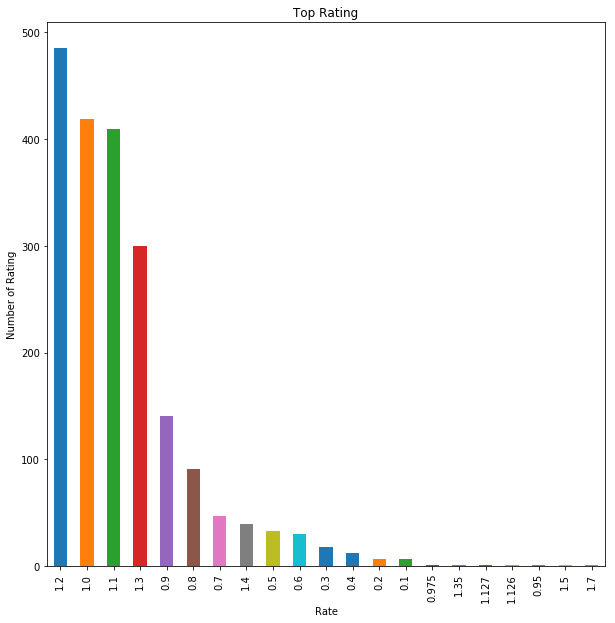

In [63]:
plt.figure(figsize=(10,10))
df=df_clean.rate.value_counts()
df.plot('bar');
plt.xlabel('Rate');
plt.ylabel('Number of Rating');
plt.title('Top Rating');


#### the most rate is 1.2 ,1.1

# Analyses

In [64]:
df_clean[df_clean['retweet_count']==df_clean['retweet_count'].max()]


,Unnamed: 0,created_at,display_text_range,favorite_count,favorited,full_text,geo,id,is_quote_status,retweet_count,retweeted,user,timestamp,source,text,retweeted_status_id,name,rate,stage
856,1037,2016-06-18 18:26:18,"[0, 91]",131075,False,Here's a doggo realizing you can stand in a po...,NaN,744234799360020481,False,79515,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2016-06-18 18:26:18,[Twitter for iPhone],Here's a doggo realizing you can stand in a po...,NaN,NaN,1.3,doggo


In [65]:
df_clean.stage.value_counts()[1:]



pupper           213
doggo             73
puppo             24
floofer            9
doggo,pupper       9
doggo,puppo        1
doggo,floofer      1
Name: stage, dtype: int64

#### most stage is pupper

In [66]:
df_clean.name.value_counts()[0:30]


Charlie    11
Lucy       11
Cooper     10
Oliver     10
Tucker      9
Penny       9
Winston     8
Sadie       8
Lola        8
Toby        7
Daisy       7
Bailey      6
Bella       6
Stanley     6
Oscar       6
Bo          6
Jax         6
Koda        6
Buddy       5
Milo        5
Scout       5
Louis       5
Bentley     5
Rusty       5
Leo         5
Chester     5
Dave        5
Cassie      4
George      4
Phil        4
Name: name, dtype: int64

#### Top five of dog name is :Charlie ,Lucy,Cooper,Oliver,Penny

In [67]:
df_clean[df_clean['favorite_count'].max()==df_clean['favorite_count']]

,Unnamed: 0,created_at,display_text_range,favorite_count,favorited,full_text,geo,id,is_quote_status,retweet_count,retweeted,user,timestamp,source,text,retweeted_status_id,name,rate,stage
344,412,2017-01-21 18:26:02,"[0, 87]",132810,False,Here's a super supportive puppo participating ...,NaN,822872901745569793,False,48265,False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-01-21 18:26:02,[Twitter for iPhone],Here's a super supportive puppo participating ...,NaN,NaN,1.3,puppo
